In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv("spam.csv", encoding="latin-1")

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3588,ham,I've sent my wife your text. After we buy them...,NaN,NaN,NaN
5454,ham,Im just wondering what your doing right now?,NaN,NaN,NaN
4592,ham,It's ok i wun b angry. Msg u aft i come home t...,NaN,NaN,NaN
4031,ham,I'm very happy for you babe ! Woo hoo party on...,NaN,NaN,NaN
5370,spam,dating:i have had two of these. Only started a...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Drop Last 3 columns

In [6]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [7]:
df.shape

(5572, 2)

### Renaming the columns

In [8]:
df.rename(columns={"v1": "target", "v2": "text"}, inplace=True)

In [9]:
df.sample(5)

,target,text
1737,ham,I cant pick the phone right now. Pls send a me...
3958,ham,Have a nice day my dear.
4826,ham,Yup but it's not giving me problems now so may...
2206,spam,"URGENT! Your mobile No 07xxxxxxxxx won a å£2,0..."
4068,ham,Hope youåÕre not having too much fun without m...


### Apply Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df["target"] = le.fit_transform(df["target"])  # spam=1, ham=0

### Check for missing values

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

### Checking for Duplicates

In [13]:
df.duplicated().sum()

403

### Removing Duplicates

In [14]:
df = df.drop_duplicates(keep="first")

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## Exploratory Data Analysis (EDA)

In [17]:
df.sample(5)

,target,text
493,0,What class of &lt;#&gt; reunion?
2806,1,December only! Had your mobile 11mths+? You ar...
1439,0,In fact when do you leave? I think addie goes ...
4887,0,You have to pls make a note of all she.s expos...
3201,0,Okay lor... Wah... like that def they wont let...


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt

### Distribution of Spam and Ham

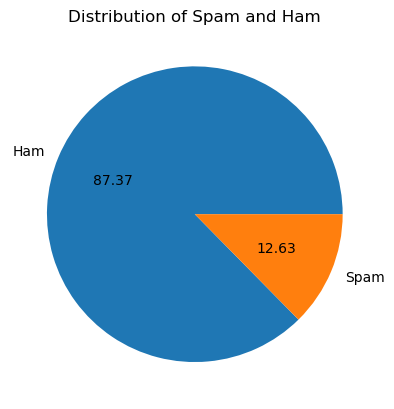

In [20]:
plt.pie(df['target'].value_counts(), labels=['Ham', 'Spam'], autopct="%0.2f") # Pie chart
plt.title("Distribution of Spam and Ham") 
plt.show()

### Data is imbalanced

In [21]:
import nltk
nltk.download('punkt') # Downloading the punkt tokenizer models

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Counting number of characters

In [22]:
df['num_characters'] = df['text'].apply(len) # Counting number of characters

In [23]:
df.sample(5)

,target,text,num_characters
673,0,Ditto. And you won't have to worry about me sa...,153
4650,1,A å£400 XMAS REWARD IS WAITING FOR YOU! Our co...,158
2060,0,I did. One slice and one breadstick. Lol,40
2113,0,"Yeah, don't go to bed, I'll be back before mid...",51
3940,1,"Free Msg: get Gnarls Barkleys \Crazy\"" rington...",102


### Number of words

In [24]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x))) # Counting number of words

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


### Counting number of sentences

In [26]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x))) # Counting number of sentences

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


### Overall Stats

In [28]:
df[['num_characters', 'num_words', 'num_sentences']].describe() # Overall stats

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


### Ham Stats

In [29]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()  # Ham stats

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


### Spam Stats

In [30]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()  # Spam stats

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
import seaborn as sns

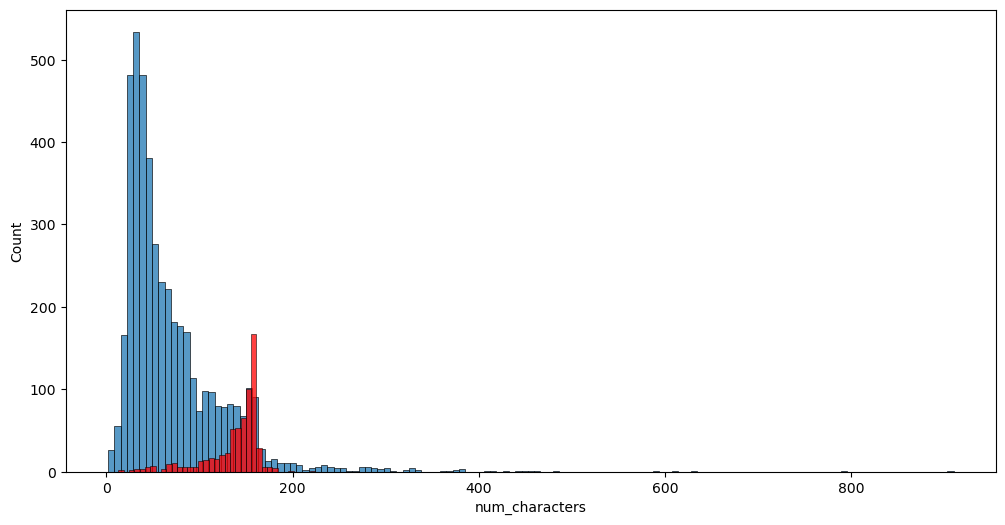

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')
plt.show()

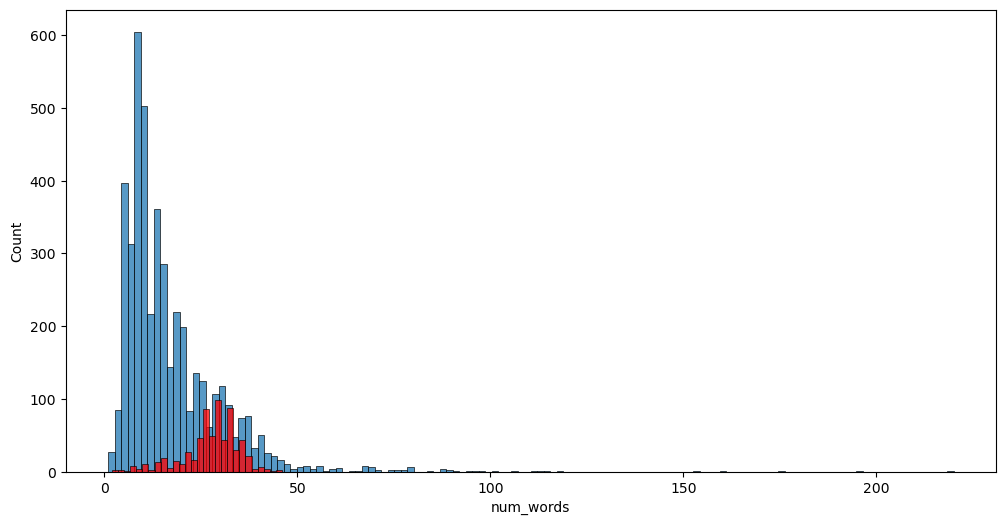

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')
plt.show()

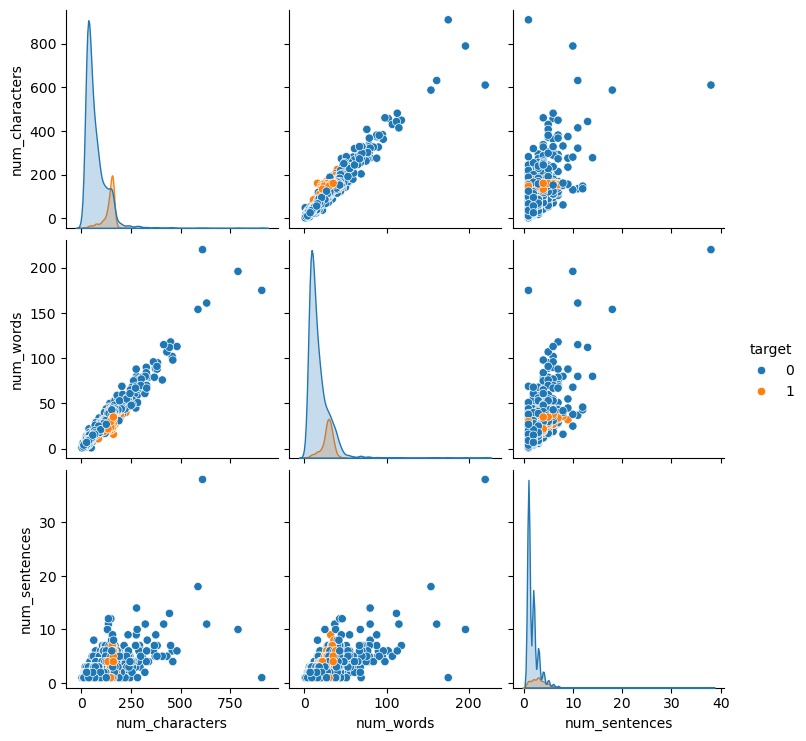

In [34]:
sns.pairplot(df, hue='target') 
plt.show()

<Axes: >

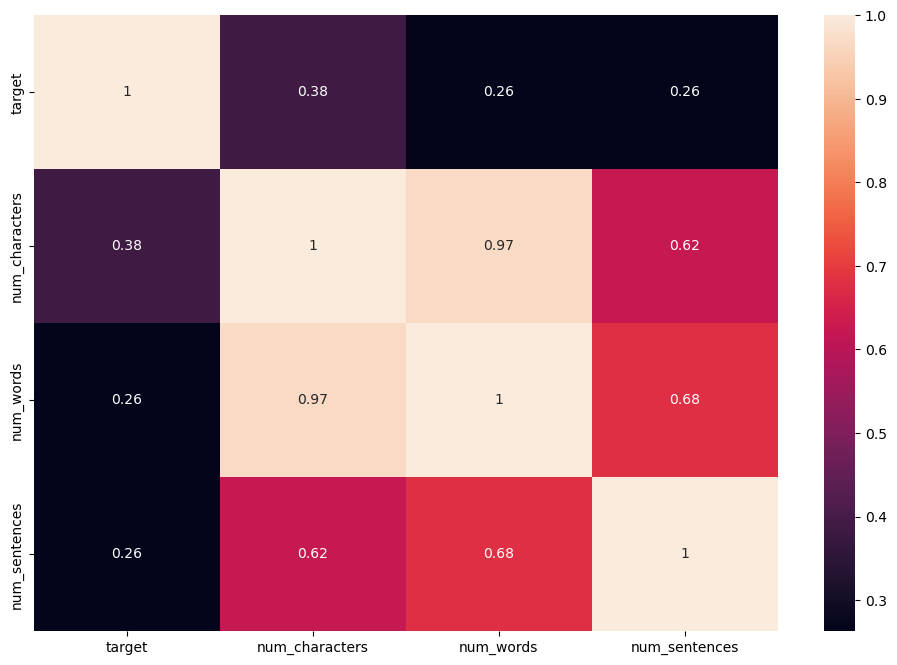

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[['target', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

## Data Preprocessing

In [36]:
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and Punctuation
# Stemming

In [37]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

ps = PorterStemmer()

In [38]:
def transform_text(text):
    text = text.lower() # Lower case

    text = nltk.word_tokenize(text) # Tokenization: splitting the text into individual words e.g. "I love coding" -> ["I", "love", "coding"]

    y = [] 
    for i in text: # Removing special characters
        if i.isalnum(): # isalnum() checks if the character is alphanumeric
            y.append(i) 
    text = y[:] # Copying the list
    y.clear() # Clearing the list

    for i in text: # Removing stop words and Punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text: # Stemming: reducing a word to its root form e.g. loving, loved -> love
        y.append(ps.stem(i))

    return " ".join(y) # Joining the list back to a string

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
# !pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 187.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.2 kB 187.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.2 kB 151.3 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/301.2 kB 231.8 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/301.2 kB 295.4 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/301.2 kB 399.3 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/301.2 kB 479.2 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/301.2 kB 542.5 kB/s eta 0:00:01
  

In [43]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

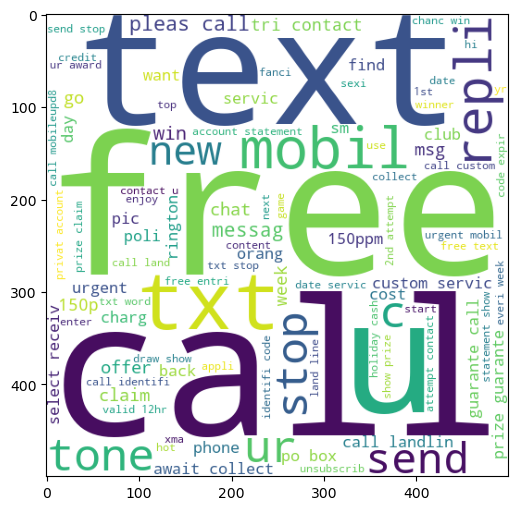

In [ ]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
plt.show()

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

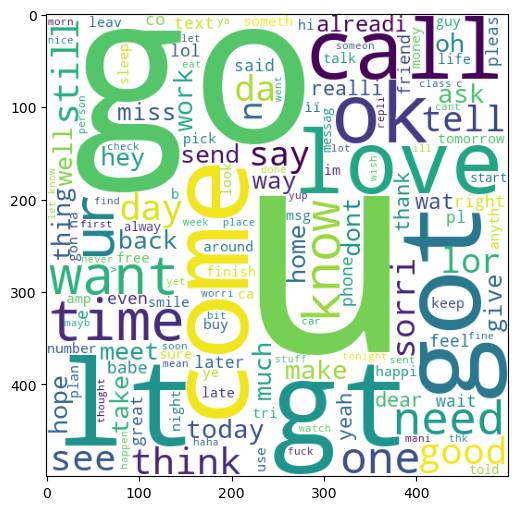

In [48]:
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)
plt.show()

In [49]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
spam_corpus = []

for msg  in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

9939

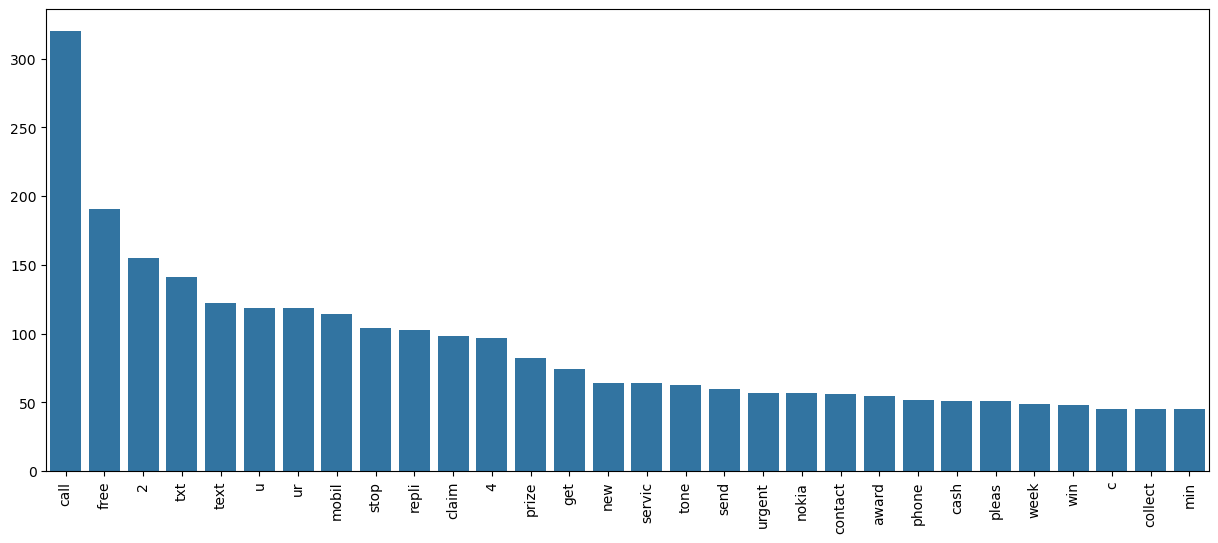

In [ ]:
from collections import Counter

plt.figure(figsize=(15, 6))
sns.barplot(x=[item[0] for item in Counter(spam_corpus).most_common(30)],
            y=[item[1] for item in Counter(spam_corpus).most_common(30)])    
plt.xticks(rotation='vertical')
plt.show()

In [60]:
ham_corpus = []

for msg  in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

35404

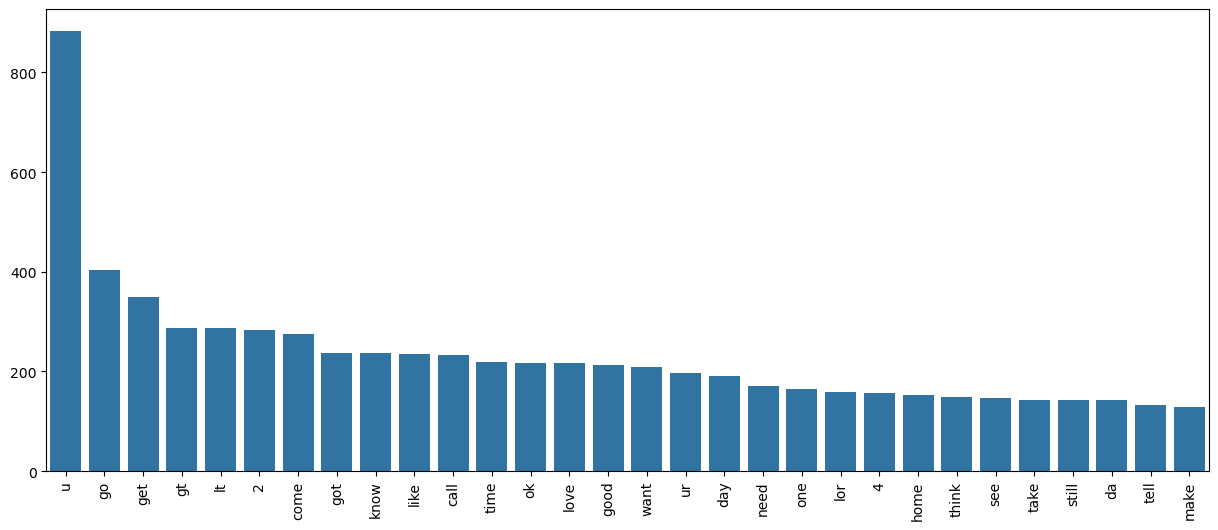

In [64]:
from collections import Counter

plt.figure(figsize=(15, 6))
sns.barplot(x=[item[0] for item in Counter(ham_corpus).most_common(30)],
            y=[item[1] for item in Counter(ham_corpus).most_common(30)])    
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [108]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [109]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [110]:
X.shape

(5169, 3000)

In [111]:
y = df['target'].values

In [112]:
y.shape

(5169,)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [114]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [115]:
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [116]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred))
print("MultinomialNB Precision:", precision_score(y_test, y_pred))
print("MultinomialNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

MultinomialNB Accuracy: 0.9709864603481625
MultinomialNB Precision: 1.0
MultinomialNB Confusion Matrix:
 [[896   0]
 [ 30 108]]


In [117]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred))
print("GaussianNB Precision:", precision_score(y_test, y_pred))
print("GaussianNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

GaussianNB Accuracy: 0.8694390715667312
GaussianNB Precision: 0.5068493150684932
GaussianNB Confusion Matrix:
 [[788 108]
 [ 27 111]]


In [118]:
bnb.fit(X_train, y_train)
y_pred = bnb.predict(X_test)
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred))
print("BernoulliNB Precision:", precision_score(y_test, y_pred))
print("BernoulliNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

BernoulliNB Accuracy: 0.9835589941972921
BernoulliNB Precision: 0.991869918699187
BernoulliNB Confusion Matrix:
 [[895   1]
 [ 16 122]]


In [119]:
# !pip install xgboost

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [121]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, max_depth=5)
gbc = GradientBoostingClassifier(n_estimators=100)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=100, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [122]:
models = {
    "Logistic Regression": lrc,
    "Support Vector Machine": svc,
    "Decision Tree": dtc,
    "Random Forest": rfc,
    "Gradient Boosting": gbc,
    "AdaBoost": abc,
    "Bagging": bc,
    "Extra Trees": etc,
    "XGBoost": xgb,
    "BernoulliNB": bnb,
    "MultinomialNB": mnb
}

In [123]:
def train_classifier(models, X_train, y_train, X_test, y_test):
    models.fit(X_train, y_train)
    y_pred = models.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [124]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [125]:
accuracy_scores = []
precision_scores = []   

for name, model in models.items():
    current_accuracy, current_precision = train_classifier(model, X_train, y_train, X_test, y_test)
    print(f"{name}:\n\tAccuracy: {current_accuracy}\n\tPrecision: {current_precision}\n")
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

Logistic Regression:
	Accuracy: 0.9584139264990329
	Precision: 0.9702970297029703

Support Vector Machine:
	Accuracy: 0.9758220502901354
	Precision: 0.9747899159663865

Decision Tree:
	Accuracy: 0.9303675048355899
	Precision: 0.8173076923076923

Random Forest:
	Accuracy: 0.8752417794970987
	Precision: 1.0

Gradient Boosting:
	Accuracy: 0.9574468085106383
	Precision: 0.9351851851851852



c:\Users\HP\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost:
	Accuracy: 0.960348162475822
	Precision: 0.9292035398230089

Bagging:
	Accuracy: 0.9574468085106383
	Precision: 0.8560606060606061

Extra Trees:
	Accuracy: 0.9748549323017408
	Precision: 0.9745762711864406

XGBoost:
	Accuracy: 0.9671179883945842
	Precision: 0.9482758620689655

BernoulliNB:
	Accuracy: 0.9835589941972921
	Precision: 0.991869918699187

MultinomialNB:
	Accuracy: 0.9709864603481625
	Precision: 1.0



In [126]:
performance_df = pd.DataFrame({'Algorithms': models.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values(by='Precision', ascending=False)

In [131]:
temp_df = pd.DataFrame({'Algorithms': models.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores}).sort_values(by='Precision_max_ft_3000', ascending=False)

In [132]:
performance_df.merge(temp_df, on='Algorithms')

,Algorithms,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,Random Forest,0.875242,1.000000,0.875242,1.000000
1,MultinomialNB,0.970986,1.000000,0.970986,1.000000
2,BernoulliNB,0.983559,0.991870,0.983559,0.991870
3,Support Vector Machine,0.975822,0.974790,0.975822,0.974790
4,Extra Trees,0.974855,0.974576,0.974855,0.974576
5,Logistic Regression,0.958414,0.970297,0.958414,0.970297
6,XGBoost,0.967118,0.948276,0.967118,0.948276
7,Gradient Boosting,0.957447,0.935185,0.957447,0.935185
8,AdaBoost,0.960348,0.929204,0.960348,0.929204
9,Bagging,0.957447,0.856061,0.957447,0.856061


In [133]:
import pickle

pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))